In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
from scipy.stats import norm

In [2]:
df = pd.read_stata('guns.dta')
df.columns

Index(['year', 'vio', 'mur', 'rob', 'incarc_rate', 'pb1064', 'pw1064',
       'pm1029', 'pop', 'avginc', 'density', 'stateid', 'shall'],
      dtype='object')

In [3]:
df.dtypes

year              int8
vio            float32
mur            float32
rob            float32
incarc_rate      int16
pb1064         float32
pw1064         float32
pm1029         float32
pop            float32
avginc         float32
density        float32
stateid           int8
shall             int8
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1173.0,88.000000,6.636079,77.000000,82.000000,88.000000,94.000000,99.000000
vio,1173.0,503.074371,334.277039,47.000000,283.100006,443.000000,650.900024,2921.800049
mur,1173.0,7.665133,7.522707,0.200000,3.700000,6.400000,9.800000,80.599998
rob,1173.0,161.820374,170.509842,6.400000,71.099998,124.099998,192.699997,1635.099976
incarc_rate,1173.0,226.579710,178.888094,19.000000,114.000000,187.000000,291.000000,1913.000000
pb1064,1173.0,5.336214,4.885688,0.248207,2.202196,4.026213,6.850673,26.979570
pw1064,1173.0,62.945473,9.761533,21.780430,59.939705,65.061279,69.200096,76.525749
pm1029,1173.0,16.081121,1.732143,12.213680,14.653370,15.895169,17.525715,22.352686
pop,1173.0,4.816339,5.252115,0.402753,1.187706,3.271332,5.685611,33.145123
avginc,1173.0,13.724799,2.554542,8.554884,11.934755,13.401551,15.271010,23.646713


In [14]:
df.isnull().sum()

year           0
vio            0
mur            0
rob            0
incarc_rate    0
pb1064         0
pw1064         0
pm1029         0
pop            0
avginc         0
density        0
stateid        0
shall          0
dtype: int64

Text(0.5, 1.0, 'Distribution plot of violent crime rate')

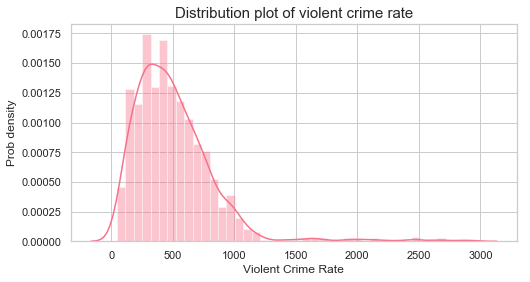

In [31]:
sns.set_palette("husl")
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.distplot(df['vio'])
plt.xlabel('Violent Crime Rate')
plt.ylabel('Prob density')
plt.title('Distribution plot of violent crime rate',fontsize=15)

Number of responses:
 0    888
1    285
Name: shall, dtype: int64


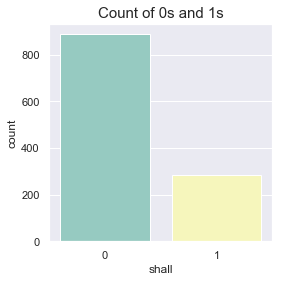

In [61]:
print("Number of responses:\n",df.shall.value_counts())
sns.set(style="darkgrid")
plt.figure(figsize=(4,4))
sns.countplot(df.shall,palette='Set3')
plt.title('Count of 0s and 1s',fontsize=15)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001456CCE59E8>,
      dtype=object)

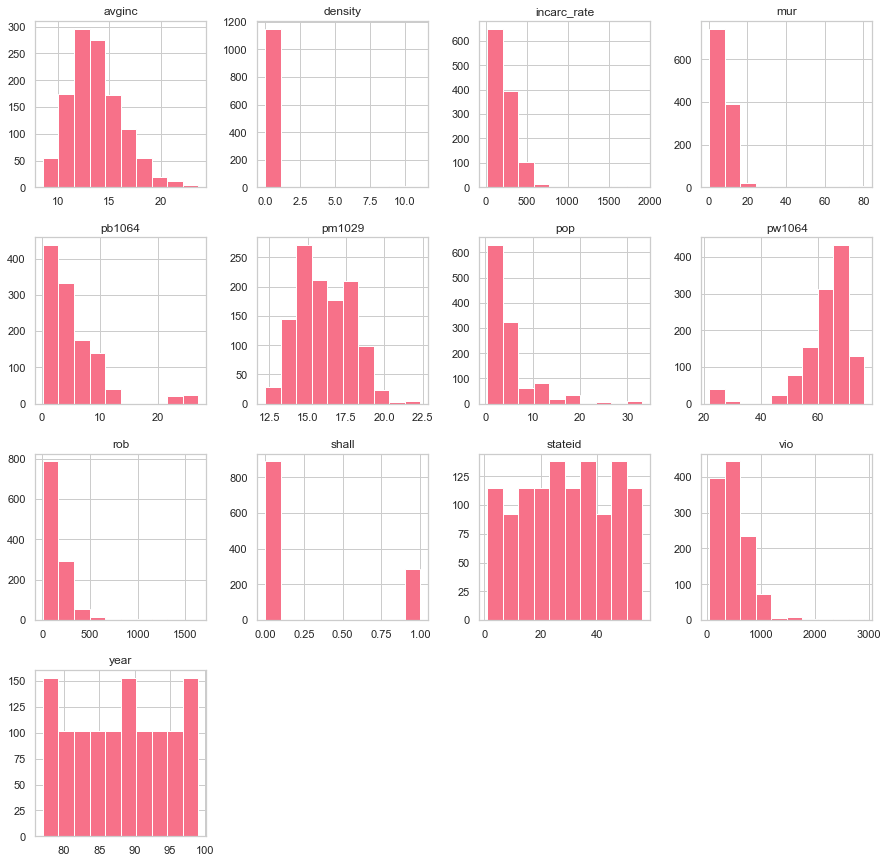

In [16]:
df[df.dtypes.index.values].hist(figsize=[15,15])

In [35]:
df.shape

(1173, 13)

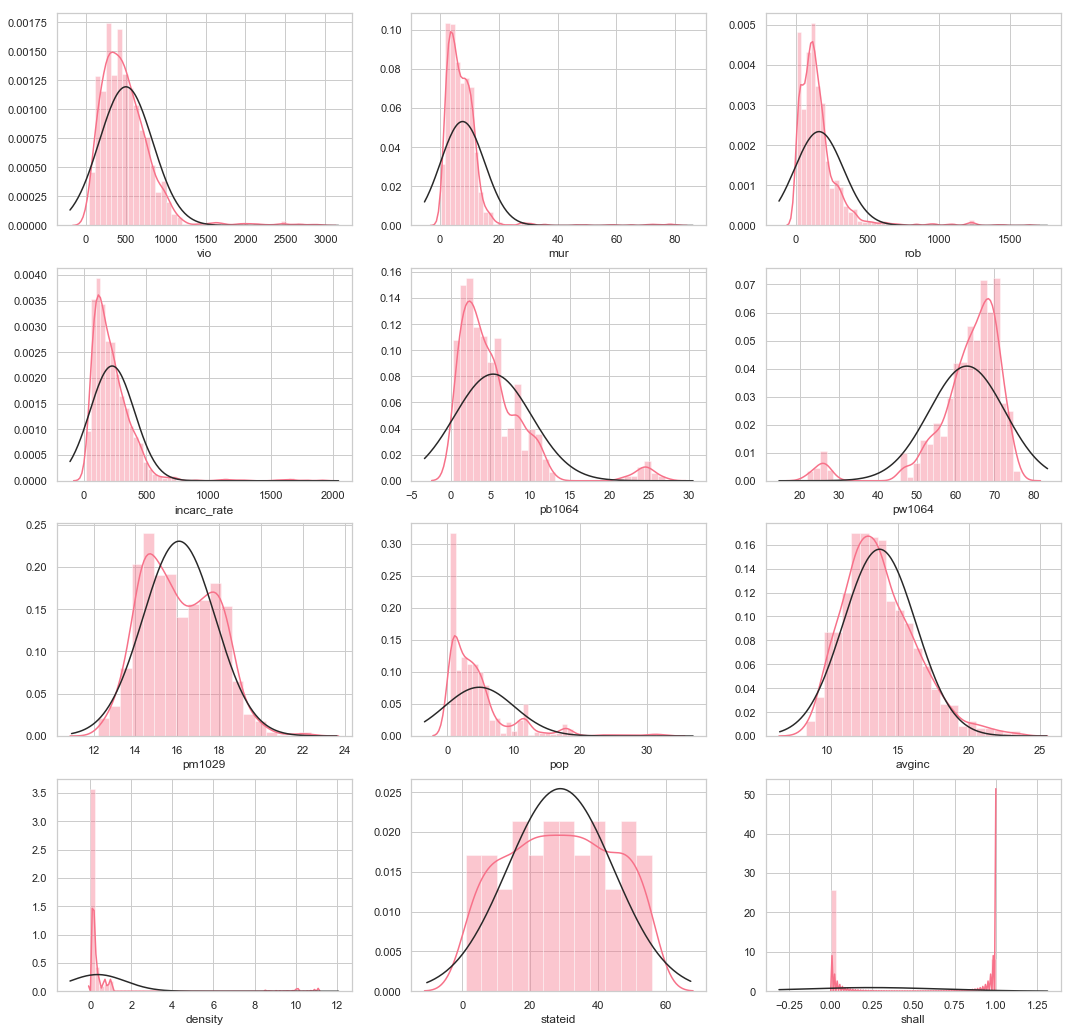

In [47]:
fig,axes = plt.subplots(4,3,figsize=(18,18))
for i,col in enumerate(df.columns[1:13]): sns.distplot(df[col],fit=norm,ax=axes[i//3,i%3])

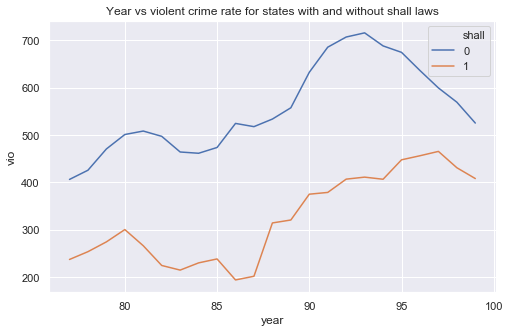

In [68]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x="year", y="vio",hue="shall", data=df, ci=None)
ax.set_title("Year vs violent crime rate for states with and without shall laws",fontdict= {'size':12})
plt.show()

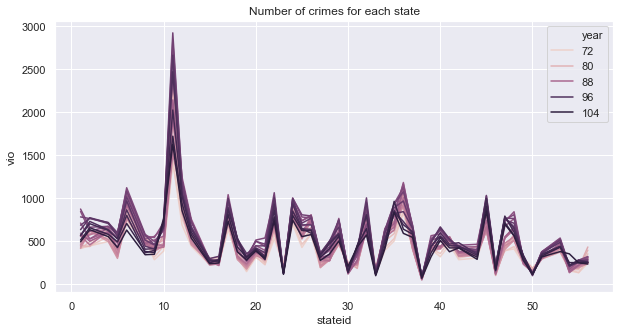

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x="stateid", y="vio",hue="year", data=df, ci=None)
ax.set_title("Number of crimes for each state",fontdict= {'size':12})
plt.show() # State 11 has the highest number of incidents

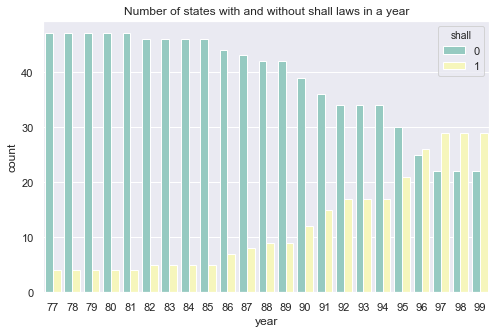

In [119]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x="year", hue="shall", data=df, palette='Set3')
ax.set_title("Number of states with and without shall laws in a year",fontdict= {'size':12})
plt.show()

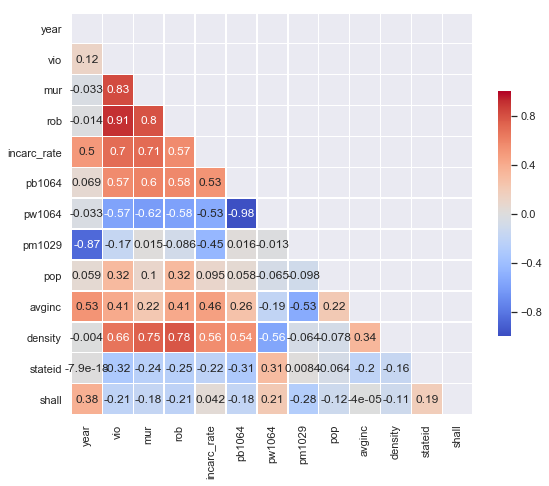

In [75]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, ax = ax, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [76]:
df['ln_vio'] = np.log(df['vio'])
df = df.drop(columns=['vio'])

In [81]:
df.head(2)

,year,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall,ln_vio
0,77,14.2,96.800003,83,8.384873,55.122906,18.174412,3.780403,9.563148,0.074552,1,0,6.026832
1,78,13.3,99.099998,94,8.352101,55.143665,17.994080,3.831838,9.932000,0.075567,1,0,6.038110


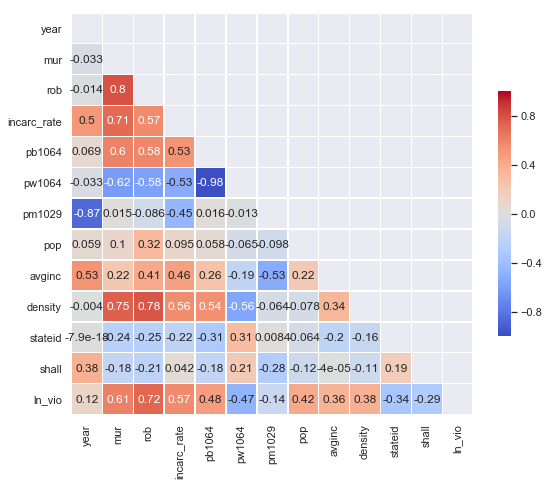

In [84]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, ax = ax, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

ln_vio is highly correlated with murder, robbery and incarceration rates as expected. pb1064 and pw1064 have almost similar correlation with ln_vio because they are both complementary.
pop, avginc, density have high negative correlation with ln_vio . The variable pm1029 has very less correlation with ln_vio